分类  

这一章讲高阶分类，自然我们还学过其他一些分类器，无论是高阶还是低阶的，它们是：  

    决策树   
    贝叶斯分类器  
    神经网络（作为分类器的使用是第六章课后题的一个要求）。  

本章继续研究分类器：  

    线性分类器  
    核方法和支持向量机（SVMs）  

例子  
本章使用一个小小的例子，用于分析得出，各种分类器优势和弱势。因此，我们要明白：将一个复杂的数据集扔给算法，然后希望算法直接产生精确的分类，这是不可能的。
我们必须学会：  

    选择正确的算法  
    对数据集进行适当的预处理  

例子描述  
本章还是使用一个实际的例子来进行对比分类算法和学习新算法。这个实际的例子是，给一男一女配对，看他们是否能否成为情侣，有点像婚姻介绍所。这个婚姻介绍所，收集了很单身男女的信息，然后我们用算法来算出这某一对是否可能成为情侣。
作为一个例子，我们收集的信息略显简短，但是非常适用。针对每一个人，我们收集：  

    年龄  
    是否吸烟  
    是否要孩子  
    兴趣列表  
    家庭住址  

那我们怎么知道哪两个人适合成为情侣呢？也许我们用人的思维来看就我们想把不吸烟的男的和女的介绍到一起。但是我们在利用机器学习的原理来判断两人是否适合成为情侣的时候，使用了训练集来训练我们的算法，也就说，这是一个监督类算法。书中为我们提供了训练集，我们可以把这个训练集看成是历史悠久的婚姻介绍所过往的记录。书中用csv格式为我们提高了500条数据，文件名：matchmaker.csv，我们来看其中一条：

39 yes  no skiing:knitting:dancing220 W 42nd St New York NY43noyessoccer:reading:scrabble824 3rd Ave New York NY0  
请注意，这只是一行。也许排版问题，过长会导致换行，但是这在matchmaker.csv文件中是一行的。  
一行数据的排列方式是：  

    男的信息开始：年龄/是否吸烟/是否要孩子/兴趣列表/家庭住址  
    接着女的信息：年龄/是否吸烟/是否要孩子/兴趣列表/家庭住址  
    最后一个0表示没有配对成功。如果配对成功用1来表示。  

除了上面一个较为完整的数据集，还有一个只有含有年龄的数据文本，这是为了让我们简单的了解算法的思想，如下图所示：  

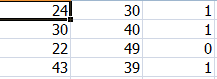

只有男的年龄和女的年龄，以及是否配对成功。  

数据我们有了，我们做的就是利用这个数据集，使用合适的算法，为新来的用户找出和他配对的对象。  


加载数据  
首先当然是把数据读入内存，书中的做法很奇怪，居然还是写了一个类：  

In [1]:
class matchrow:
    def __init__(self,row,allnum = False):
        if allnum:
            self.data = [float(row[i]) for i in range(len(row)-1)]
        else:
            self.data = row[0:len(row)-1]
        self.match = int(row[len(row)-1])
        
def loadmatch(f,allnum=False):
    rows=[]  
    for line in open(f):
        rows.append(matchrow(line.split(','),allnum)) 
    return rows

而且这样导致我打印的时候打印的是这个类的一个对象的地址，不是实际拿到了这个年龄之类的数值。

In [2]:
agesonly = loadmatch('agesonly.csv',allnum=True)
matchmaker = loadmatch('matchmaker.csv')

图形展示数据  
如果还是一列一列的观察就没有意义了。我们首先要使用图形的方式来展示一下数据，进而分析，对于年龄，我们用男性的年龄到x轴，女性的年龄到y轴，让我们来看看实现的代码：

In [3]:

from pylab import *  
def plotagematches(rows):  
    #读出配对成功的x坐标和y坐标  
    xdm,ydm=[r.data[0] for r in rows if r.match==1],[r.data[1] for r in rows if r.match==1]  
    #读出不配对成功的x坐标和y坐标  
    xdn,ydn=[r.data[0] for r in rows if r.match==0],[r.data[1] for r in rows if r.match==0]  


    #画绿点  
    plot(xdm,ydm,'go')  
    #画红点  
    plot(xdn,ydn,'ro')  
    show()  

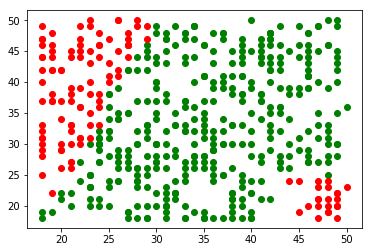

In [4]:
plotagematches(agesonly)

对面这个散布图进行分析。我们就会发现两点：  

    配对成功的年龄都比较接近，年龄相差越大，越不易配对成功  
    年龄越大，年龄的相差尽管大，配对成功的还是比较多的。  

利用决策树进行分类
在我们第7章例子中，决策树是依据数据边界值来对数据进行划分的，比如浏览网页的次数，大于多少次和小于多少次。如果我们使用这样的方式对年龄来进行分类呢？
如下图所示：

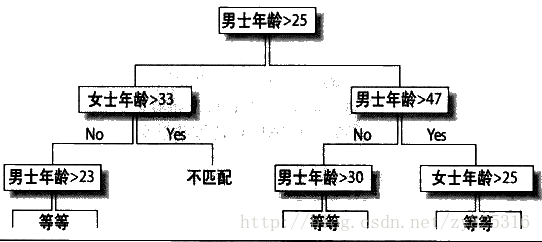

很显然，结果是糟糕的。因为，成不成对关键是看差距，不能简单的认为男的大于多少，女的小于多少就容易成对。如果从图像的角度来看，就是这样的：

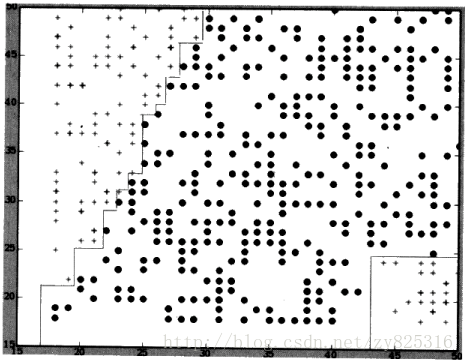

 决策树做的分类就在图中画了一条垂直线或者是水平线，但是最后水平线的上线或者垂直线的左右，都混杂了两种分类。所以，决策是不成功的。
所以，有两点非常重要：  

    数据含义不清楚之前，不要轻易使用，而散布图有利于我们分析数据  
    对于多个数值的输入，并且输入之间还存在关系的，适合用决策树。  
    所以，我们隆重推荐基本的线性分类  

基本的线性分类  

虽然简单，但是是基础。  
原理  
寻找每个分类所有数据的平均值，构造一个代表该分类中心位置的点。对一个新数据，看其对哪个分类更近就知道其的分类了。  
对于本实验来说来说，我们所谓的分类就是两种，就是配对的1和不配对的2。  
代码：  

In [5]:
def lineartrain(rows):
    averages = {}
    counts = {}
    
    for row in rows:
        #得到该坐标点所属的分类
        c1 = row.match
        
        #下面两句应该只有第一次出现的时候才会有用吧
        averages.setdefault(c1,[0.0]*(len(row.data)))
        counts.setdefault(c1,0)
        
        #将该坐标点加入averages中 
        for i in range(len(row.data)):
            averages[c1][i] += float(row.data[i])
            
        #记录该分类有多少个坐标点
        counts[c1] += 1
    #将总和除以计数值以求得平均值  
    for c1,avg in averages.items():
        for i in range(len(avg)):
            avg[i] /= counts[c1]
            
    return averages

In [6]:
avgs=lineartrain(agesonly)
avgs

{0: [26.914529914529915, 35.888888888888886],
 1: [35.48041775456919, 33.01566579634465]}

我没有把上面的点绘制到图上去，所以借用了书中图，如下：

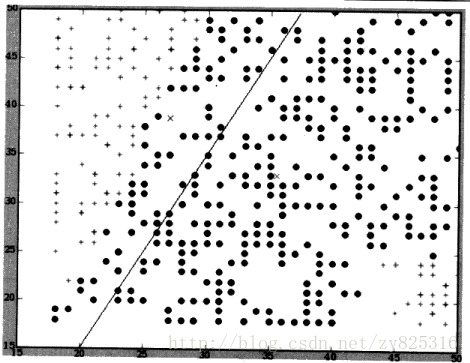

 其中X点就计算出来的均指点，而且还有一条划分数据的直线，处于两个X点的中间位置。因此，所有在直接左侧的坐标点都表示不想匹配，而右侧的坐标点更接近于相匹配。  
给新数据分类  
对一个新数据，那么我们就将其作为新点，判断其接近于哪个分类点。  
两点之间的距离的算法可以用欧几里得来计算。但是书中要求使用向量、点积的方式来计算。  
点积又称数据积：两个非零向量a=（x1，y1），b=（x2，y2），则有a·b=x1x2+y1y2，即两个向量的数量积等于它们对应坐标的乘积的和  
上面阐述了一种计算方式，代码如下：  

In [7]:
#两个向量的点积 
def dotproduct(v1,v2):
    return sum([v1[i]*v2[i] for i in range(len(v1))])

 点积可以，利用两个向量的长度乘积，再乘以两者夹角的余弦求得。注意，夹角大于90度，那么夹角余弦值为负，此时点积结果也为负值。  

举例说明，分类点M0（相匹配）和M1（不想匹配），新点X1和X2，C点是M0->M1的中点。  

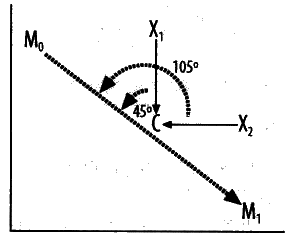

于是可以看出，X1->C与M0->M1的角度为45度，所以点积为正，所以属于M0。X2->C与M0->M1的角度为105度，所以点积为负，所以属于M1。


    两向量方向相反为负，负的属不同分类
    两向量方向相同为正，正的属相同分类

计算公式  

注意C是M0和M1的均值点，sign是点积

相乘后

In [8]:
def dpclassify(point,avgs):
    #这里之所以avgs[1]是代表分类点0的，因为在去读agesonly的数据时，分类1先被读进去来了。
    b = (dotproduct(avgs[1],avgs[1]) - dotproduct(avgs[0],avgs[0]))/2
    
    #上面的公式可能有误，公式应该是：class = sign(x.m1-x.m0+(m0.m0 - m1.m1)/2) 
    y = dotproduct(point,avgs[0]) - dotproduct(point,avgs[1]) + b
    if y>0: return 0
    else: return 1

In [9]:
dpclassify([30,25],avgs)

1

In [10]:
dpclassify([25,40],avgs)

0

In [11]:
dpclassify([48,20],avgs)

1

## 分类特征

婚介数据集中既包含有数值数据，也包含有分类数据。本章介绍的分类器只能数值类型的数组，所以在数据集中的是否吸烟这样的需要转化为1或者-1

In [12]:
def yesno(v):
    if v=='yes': return 1
    elif v=='no': return -1
    else: return 0

对于兴趣的处理，书中采用一种非常聪明的办法，就是如果两人有共同的兴趣则加1，而不是维护一张巨大的矩阵，以所有兴趣都列，以人为行来表。书中提出，更聪明的做法是：将所以兴趣分层来统计，比如体育下有雪地运动，雪地运动下有滑雪和滑板：如果两个都喜欢滑雪，那就加1分。如果一个喜欢一个喜欢滑板就相当于都喜欢雪地运动，加0.8分。如果都喜欢体育运动加0.5分。这个思路我觉得很科学。对于住址的处理方式是使用了yahoo地图的距离计算，我觉得很聪明，如果近的话，理应得到高分。

In [13]:
def matchcount(intersest1,intersest2):
    L1=intersest1.split(':')
    L2=intersest2.split(':')
    x=0
    for v in L1:
        if v in L2: x+=1
    return x

## 构造新的数据集

In [ ]:
def loadnumerical():
    oldrows = loadmatch('matchmaker.csv')
    newrows = []
    for row in oldrows:
        d=row.data
        data=[float(d[0]),yesno(d[1]),yesno(d[2]),
              float(d[5]),yesno(d[6]),yesno(d[7]),
              matchcount(d[3],d[8]),
              milesdistance(d[4],d[9]),
              row.match]
        newrows.append(matchrow(data))
    return newrows


## 缩放处理

  对数据必须进行缩放处理，这是因为年龄对比时，会产生年龄的差值比如是1岁、7岁，但是要不要孩子的问题上，却最大差距只有2（一个人要孩子为1，另一个人不要孩子为-1），但是显然要不要孩子比年龄差几岁重要的多。所以，我们必须要让所有数据都在同一尺度上之后才有可比性。具体做法是：找出最小值，所有数据减去最小值，这样所有数据都是以0为起点，然后除以最小值和最大值之差，从而所有的数据都介于0到1之间。

In [15]:
def scaledata(rows):
    low = [999999999.0]*len(rows[0].data)
    high = [-9999999.0]*len(rows[0].data)
    
    #找出最大最小值 
    for row in rows:
        d = row.data
        for i in range(len(d)):
            if d[i] < low[i]:low[i]=d[i]
            if d[i] > high[i]:high[i]=d[i]
    #数据缩放函数
    def scaleinput(d):
        return [(d.data[i] - low[i])/(high[i] - low[i])
                   for i in range(len(low))]
    #缩放处理
    newrows = [matchrow(scaleinput(row.data)+[row.match])
                  for row in rows]
    
    #返回缩放后的数据和缩放函数
    

作为一个线性分类器，它只能找出一条分界线。如果一条直线分不好的话，就不会成功，至少分类不精准。比如说，如果判断48岁和20岁，该算法就会给出匹配的结果，但是这是错误的，那么我们使用核方法来对此进行改进。


核方法  
理解其只需要两幅图，第一幅，让我们在下图中找到两类的均指点和一根线，用于分类。  

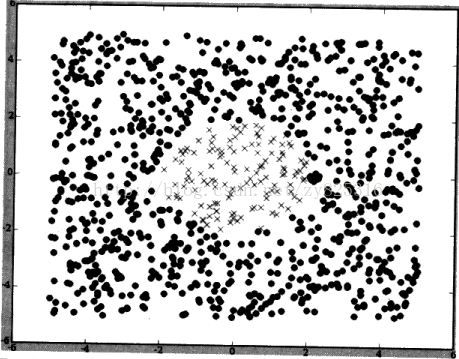

看了图之后就发现不可能，因为两个类的均值点都是原点，是同一点。

我们进行改进：对每一点的X和Y都求个平方，再画图，如下：

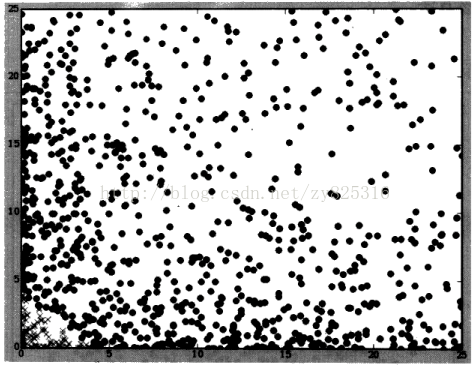

现在找均指点和划线变得非常容易了吧，对需要判断数据的新点，我们也平方在之后再去判断。所以，这意味着我们预先对坐标点进行变换，就可以只用一条线进行划分数据集
当然，这个作为例子是非常简单，实际情况复杂多了。也许会让我们用两个坐标X,Y构建三个坐标，形成三，甚至多维之后才能方便找到两个分类间的均值点和分界线（多维的情况也许会形成面吧）比如：对于x,y的坐标系，我们可以转换为a,b,c三者形成的新坐标系，转换条件为

    a=x^2  
    b=x*y  
    c=y^2    

核技法
上述方法虽然行得通，但是当数据投影到了上百上千维的时候，实际这些功能也非常不切实际。对于任何用了点积运算的算法（包括了线性分类器），我们都可以使用核技法技术。
核心思想是：用新的函数代替原来的点积函数，借助一个映射函数将数据第一次变换到更高维度的坐标空间时，新函数将返回高纬度坐标空间内的点积结果。而这样的
新函数很多，常用是径向基函数。
径向基函数与点积函数类似。这里，我们用径向基函数代替点积函数，因为它能够将数据映射到更为复杂的空间中。
计算代码：

In [58]:
def rbf(v1,v2,gamma = 20):
    dv = [int(v1[i]) - int(v2[i]) for i in range(len(v1))] #v1[i]需要被转换为int型，但是书中没提。
    L = veclength(dv)
    return math.e**(-gamma*L)

def veclength(v):  #书中未提到，但是必须用的函数  
    return sum([p**2 for p in v])  

此外，当我们对一个新数据，也就是新点，判断其分类的时候，我们还要计算其到均指点的距离。在这里，我们改变了策略。下面两种算法等价。
对一组向量求均值后，再求与某一个向量的点积。
先求某一个向量与该组每一个向量的点积，再计算均值。
现在我们写一函数完成上面第二种说法的过程，是求点积还是求径向基是一回事。代码如下：

In [62]:
#利用径向基函数判断新点到分类点的距离  
#分类点也是在本函数中计算出来的。  
#point为新点  
#rows为训练数据集 

def nlclassify(point,rows,offset,gamma = 10):
    sum0 = 0.0
    sum1 = 0.0
    count0 = 0
    count1 = 0
    
    for row in rows:
        if row.match == 0:
            sum0 += rbf(point,row.data,gamma)
            count0 += 1
        else:
            sum1 += rbf(point,row.data,gamma)
            count1 += 1
    y = (1.0/count0)*sum0 - (1.0/count1)*sum1 + offset
    
    if y>0: return 0 #和书上不一样，但是和书提供的源代码一致
    else: return 1
    
    
#偏移量的计算可以先于计算好，算好之后直接传入，不必每次转换空间都换一下    
def getoffset(rows,gamma=10):
    L0 = []
    L1 = []
    for row in rows:
        if row.match == 0: L0.append(row.data)
        else: L1.append(row.data)
    sum0 = sum(sum([rbf(v1,v2,gamma) for v1 in L0]) for v2 in L0)
    sum1 = sum(sum([rbf(v1,v2,gamma) for v1 in L1]) for v2 in L1)
    
    return (1.0/(len(L1)**2))*sum1-(1.0/(len(L0)**2))*sum0


In [63]:
offset=getoffset(agesonly)

In [69]:
print ("[30,30]",nlclassify([30,30],agesonly,offset))
print ("[30,25]",nlclassify([30,25],agesonly,offset)) 
print ("[25,40]",nlclassify([25,40],agesonly,offset))
print ("[48,20]",nlclassify([48,20],agesonly,offset))

[30,30] 1
[30,25] 1
[25,40] 0
[48,20] 0


我们得到了正确的结果，最关键的就是最后一组数据，在核技法的方法下，会判断其不会配对。而在基本的线性分类里，会判断其成功配对。

支持向量机（SVM）  
原理  
为了理解支持向量机存在的目的和作用，请看下图，下图中试着用一条线将两个类划分开来。   

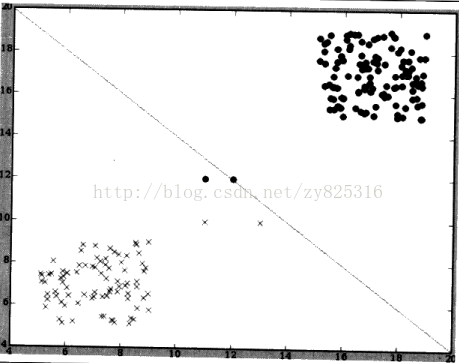

但是，由于有一些点非常接近利用均指点得到的分界线，所以被划分到了错误的分类。书中指出（但是我觉得不是特别重要）：关键原因是因为大多数数据都是远离分界线的，所以判断坐标点的分类与是否位于直线的某一侧并没有太多的意义。
为了解决这个问题，请使用支持向量机，支持向量机是一组方法的统称，它要求寻找一条尽可能远离所有分类的线，该线被称为最大间隔超平面。
产生分界线的依据是：寻找两条分别经过各分类相应坐标点的平行线，并使其与分界线的距离尽可能的远。线如下图所示：

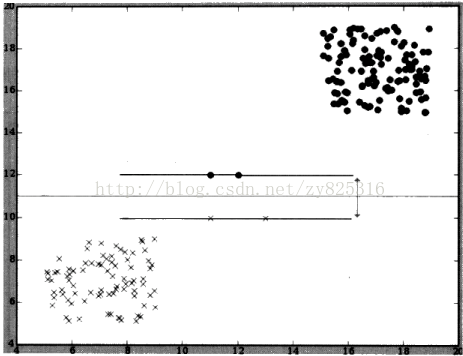

对于新的数据，新的点，我们只需要看在其在分界线的哪一侧就可以判断其所属分类了。
然而，请注意，位于分界线（间隔区）边缘的坐标点才是确定分界线位置所必需的，即使左下和右上的数据点是不存在，那么分界线依然还会处于相同的位置。我们称分界线附近的点，也就是用于确定分界线的坐标点为：支持向量。为了寻找支持向量，利用支持向量来寻找分界线的算法就是支持向量机。
请注意：由于支持向量机也要使用到点积的结果。前面的论述已经讲过，如果利用点积的结果来做比较，使用核技法后，就可以将一个线性分类器转换为非线性分类器。同样，如果支持向量机使用核技法的话，也可以用于非线性分类。所谓线性分类和非线性分类，个人关键就是在当前维度能否找到一个一条直线用于分类，如果不行，要将当前的x、y组合产生便于分类其他坐标（可以是任意维度）。
应用
支持向量机对高维数据的处理非常好，所以常用于解决数据量大的科学问题和处理复杂数据集的问题，如：  

    对面部表情进行分类  
    用军事数据侦测入侵者  
    根据蛋白质序列预测蛋白质结构  
    笔迹识别  
    确定地震期间的潜在危害  